# (Dataset Exploration Title)
## by (Abdelrahman Talaat)

## Preliminary Wrangling

> This document explored a dataset containing information about 183412 ford go bike trip

In [65]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(df.dtypes)
print(df.shape)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
(183412, 16)


In [4]:
df.start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'The Embarcadero at Steuart St', 'Market St at Dolores St',
       'Grove St at Masonic Ave', 'Frank H Ogawa Plaza',
       '4th St at Mission Bay Blvd S', 'Palm St at Willow St',
       'Washington St at Kearny St', 'Post St at Kearny St',
       'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Channing Way at Shattuck Ave',
       'Bancroft Way at College Ave', 'Howard St at Mary St',
       '22nd St at Dolores St', 'Laguna St at Hayes St',
       '5th St at Folsom', 'Telegraph Ave at 23rd St',
       'Page St at Scott St', 'Lake Merritt BART Station',
       'West St at 40th St', 'The Embarcadero at Sansome St',
       'Folsom St at 9th St', 'University Ave at Oxford St',
       'MLK Jr Way at University Ave', 'The Embarcadero at Bryant St',
       '17th St at Valencia St', 'Valencia St at 16th St',
       'Valencia St at 22nd St', 'Fran

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
print(df.user_type.unique())
print(df.bike_share_for_all_trip.unique())
print(df.member_gender.unique())



['Customer' 'Subscriber']
['No' 'Yes']
['Male' nan 'Other' 'Female']


# Data cleaning

deleting unwanted data

In [79]:
df_clean = df.drop(['start_station_id','start_station_name','start_station_latitude'
                    ,'start_station_longitude', 'end_station_id','end_station_name',
                    'end_station_latitude','end_station_longitude','start_time','end_time','bike_id'],axis = 1)

df_clean.head()

,duration_sec,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,Customer,1984.0,Male,No
1,42521,Customer,NaN,NaN,No
2,61854,Customer,1972.0,Male,No
3,36490,Subscriber,1989.0,Other,No
4,1585,Subscriber,1974.0,Male,Yes


In [8]:
df_clean.isna().sum()

duration_sec                  0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> there is about 180000 observations in this data set some of the columns were trimmed since i couldnt find them useful.
The data include duration of the bikeshare , if it was shared for all the trip , gender of the person , type of the user
### What is/are the main feature(s) of interest in your dataset?

> will be interesting to know if the duration of the ride will be affected by other variables 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration of the ride will be the most useful.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I will start by looking at the distribution of th emain variable of interest: duration.

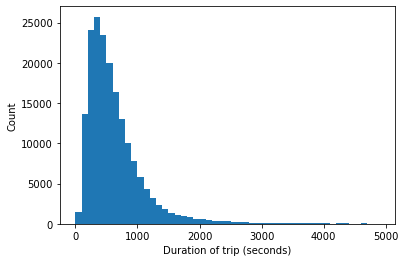

In [9]:
bins = np.arange(0,5000,100)
plt.hist(data = df_clean, x= 'duration_sec',bins = bins);
plt.xlabel('Duration of trip (seconds)')
plt.ylabel('Count');

> looks like most of trips are less than 1000seconds long but lets take a better look using a logerthmic scale

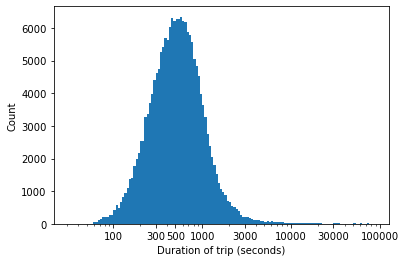

In [145]:
bins = 10**np.arange(1.5,np.log10(df_clean.duration_sec.max()),0.025)

plt.hist(data = df_clean, x= 'duration_sec', bins = bins);
plt.xscale('log')
plt.xlabel('Duration of trip (seconds)')
plt.xticks([100,300,500,1000,3000,10000,30000,100000],[100,300,500,1000,3000,10000,30000,100000]) 
plt.ylabel('Count');
plt.show()

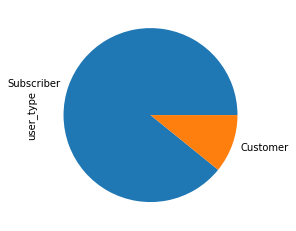

In [72]:
df.user_type.value_counts().plot.pie()
plt.xticks(rotation = 0);

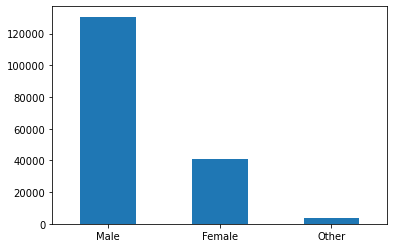

In [48]:
df.member_gender.value_counts().plot.bar()
plt.xticks(rotation = 0);

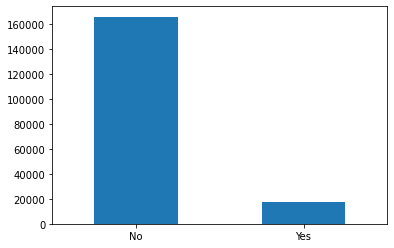

In [50]:
df.bike_share_for_all_trip.value_counts().plot.bar()
plt.xticks(rotation = 0);

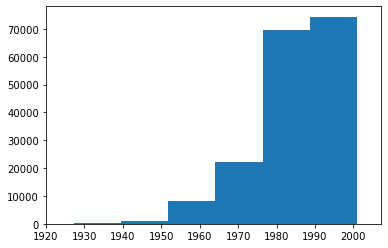

In [67]:
df.member_birth_year.hist(grid = False);
plt.xlim(1920);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> most of trip durations are about 600secs long

>there are more subscribers than customers

> other genders are rare but most interesting that female users are much lower than males

>most people dont bike share for all of the trip

> and finally not alot of old people use the app and its mostly younger people


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the duration histogram appeared to be long tailed so it was plotted on a log scale to look more natural and understandable

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [80]:
numeric_vars = ['duration_sec', 'member_birth_year']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

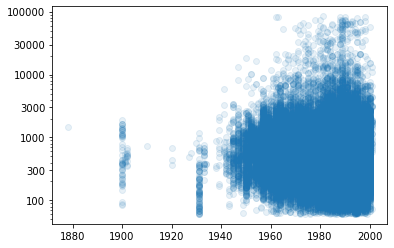

In [155]:
plt.scatter(data = df_clean, x = 'member_birth_year',y = 'duration_sec', alpha = 0.1)
plt.yscale('log')
plt.yticks([100,300,1000,3000,10000,30000,100000],[100,300,1000,3000,10000,30000,100000]);

#### People who ride for longer duration are usually younger and the app is usually used by the younger generation

(0.0, 3000.0)

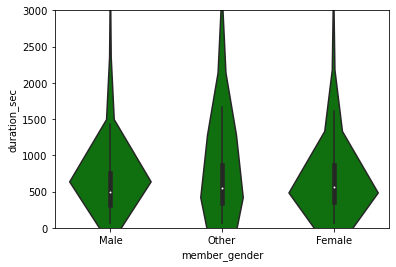

In [149]:
sb.violinplot(data = df_clean,x = 'member_gender', y = 'duration_sec', color = 'green')
plt.ylim(0,3000)

#### need further investigation

(0.0, 3000.0)

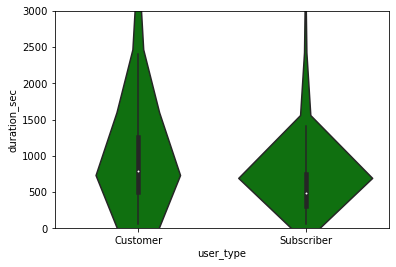

In [150]:
sb.violinplot(data = df_clean,x = 'user_type', y = 'duration_sec', color = 'green')
plt.ylim(0,3000)

#### customers have a higher duration of ride more than the subscribers

(0.0, 3000.0)

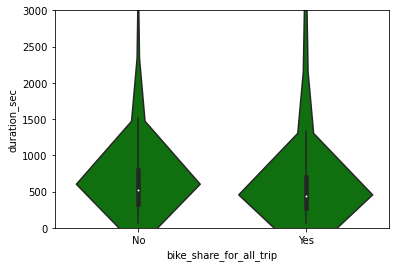

In [151]:
sb.violinplot(data = df_clean,x = 'bike_share_for_all_trip', y = 'duration_sec', color = 'green')
plt.ylim(0,3000)

##### #shows that subscribes indeed has less duration time but that also females usually have more duration time in all gender types

(0.0, 3000.0)

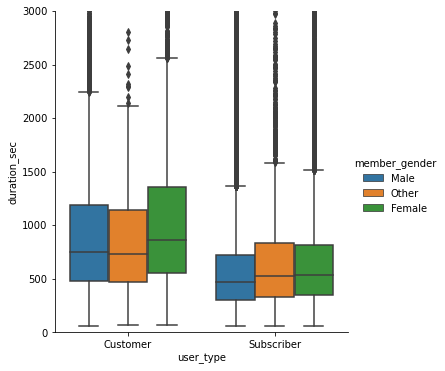

In [118]:
g = sb.catplot(x="user_type", y="duration_sec", hue="member_gender",
            kind="box", data=df_clean)
plt.ylim(0,3000)



#### subscribes indeed has less duration time but that also females usually have more duration time in all gender types

(0.0, 3000.0)

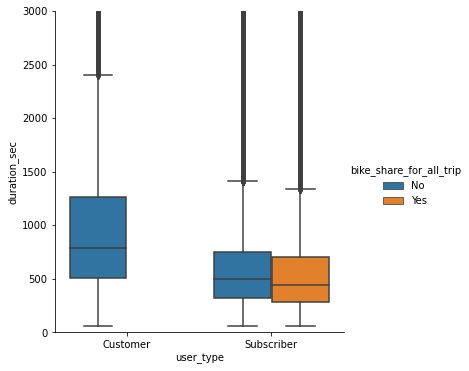

In [119]:
g = sb.catplot(x="user_type", y="duration_sec", hue="bike_share_for_all_trip",
            kind="box", data=df_clean)
plt.ylim(0,3000)

#### people who bike share for all trips have the lowest duration 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> People who ride for longer duration are usually younger and the app is usually used by the younger generation


>bike share for all trip doesnt matter with duration of the ride

> subscribes have less duration time but that also females usually have more duration time in all gender types

> people who bike share for all trips have the lowest duration 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> other genders have the same duration time in subscribe user types but the lowest duration time in customer use types
> customers dont bike share for all trip

## Multivariate Exploration



In [120]:
df_clean.head()

,duration_sec,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,Customer,1984.0,Male,No
1,42521,Customer,NaN,NaN,No
2,61854,Customer,1972.0,Male,No
3,36490,Subscriber,1989.0,Other,No
4,1585,Subscriber,1974.0,Male,Yes


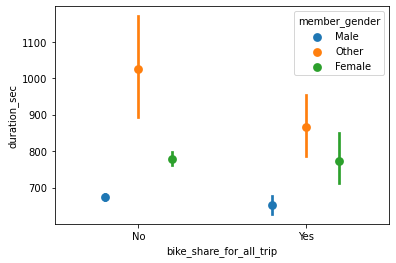

In [135]:
g = sb.pointplot(data = df_clean, x='bike_share_for_all_trip', y = 'duration_sec', hue = 'member_gender'
                 , linestyles = '', dodge = 0.4)

#### other genders bike share for all trip the most and men the least

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> males have the lowest bike sharing rate white other genders ate the most and females are in the middle

### Were there any interesting or surprising interactions between features?

> yes that other genders bike share for all trip the most and men the least